In [12]:
import pickle
import os
import pandas as pd
import seaborn as sns

In [13]:
results_file_names = []
for f in os.listdir('gold_docking') :
    if f.endswith('results.p') :
        results_file_names.append(f)

In [14]:
all_ds = []
for file_name in results_file_names :
    with open(os.path.join('gold_docking', file_name), 'rb') as f :
        results_d = pickle.load(f)
        all_ds.append(results_d)

In [15]:
len(results_file_names)

701

In [5]:
tasks = ['flexible', 'all', 'ccdc', 'model', 'energy']

In [6]:
table = pd.DataFrame()
for d in all_ds :
    for task in tasks :
        d[task]['pdb_id'] = d['pdb_id']
        d[task]['smiles'] = d['smiles']
        d[task]['task'] = task
        table = table.append(pd.Series(d[task]), ignore_index=True)

<AxesSubplot:xlabel='task', ylabel='top_score'>

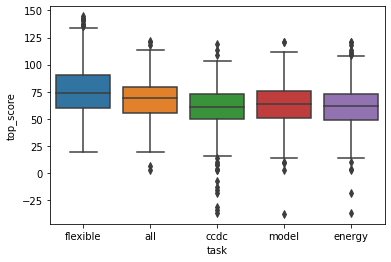

In [7]:
sns.boxplot(data=table, x='task', y='top_score')

<AxesSubplot:xlabel='task', ylabel='min_rmsd'>

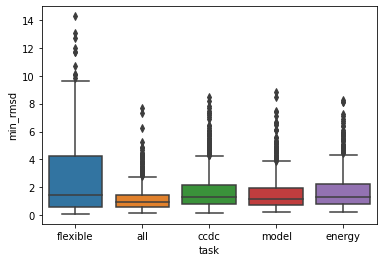

In [8]:
sns.boxplot(data=table, x='task', y='min_rmsd')

<AxesSubplot:xlabel='task', ylabel='docking_power'>

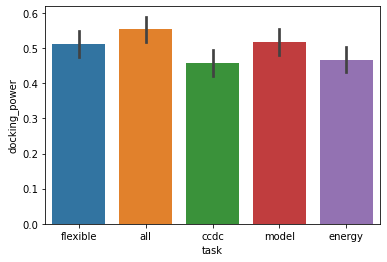

In [9]:
sns.barplot(data=table, x='task', y='docking_power')

<AxesSubplot:xlabel='task', ylabel='runtime'>

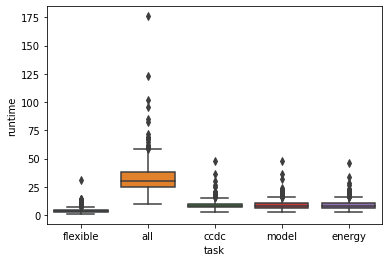

In [10]:
sns.boxplot(data=table, x='task', y='runtime')

<AxesSubplot:xlabel='task', ylabel='runtime'>

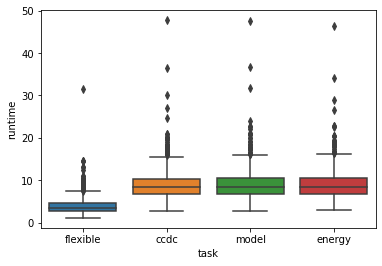

In [11]:
sns.boxplot(data=table[table['task'] != 'all'], x='task', y='runtime')